In [2]:
import sys
sys.path.append('/home/catskills/Desktop/openasr/Python-WORLD')

In [12]:
from pathlib import Path

import numpy as np
from scipy.io.wavfile import read as wavread
from scipy.io.wavfile import write as wavwrite
from scipy import signal

from world import main

wav_path = '/home/catskills/Desktop/openasr/Python-WORLD/test/BABEL_BP_107_11031_20120617_182613_inLine.wav'

In [10]:
import os
os.getcwd()

'/home/catskills/Desktop/openasr/Python-WORLD/example'

In [14]:
import librosa

In [15]:
x,fs=librosa.load(wav_path)

In [16]:
fs

22050

In [17]:
if 0:  # resample
    fs_new = 16000
    x = signal.resample_poly(x, fs_new, fs)
    fs = fs_new

if 0:  # low-cut
    B = signal.firwin(127, [0.01], pass_zero=False)
    A = np.array([1.0])
    if 0:
        import matplotlib.pyplot as plt
        w, H = signal.freqz(B, A)

        fig, (ax1, ax2) = plt.subplots(2, figsize=(16, 6))
        ax1.plot(w / np.pi, abs(H))
        ax1.set_ylabel('magnitude')
        ax2.plot(w / np.pi, np.unwrap(np.angle(H)))
        ax2.set_ylabel('unwrapped phase')
        plt.show()
    x = signal.lfilter(B, A, x)

In [18]:
vocoder = main.World()

In [19]:
# analysis
dat = vocoder.encode(fs, x, f0_method='harvest', is_requiem=True) # use requiem analysis and synthesis

/home/catskills/Desktop/openasr/Python-WORLD/world/d4cRequiem.py:150: RuntimeWarning: divide by zero encountered in true_divide
  group_delay = static_centroid / smoothed_power_spectrum  # T_g(w)
/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/numpy/lib/function_base.py:1269: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


In [20]:
if 0:  # global pitch scaling
    dat = vocoder.scale_pitch(dat, 1.5)
if 0:  # global duration scaling
    dat = vocoder.scale_duration(dat, 2)
if 0:  # fine-grained duration modification
    vocoder.modify_duration(dat, [1, 1.5], [0, 1, 3, -1])  # TODO: look into this


# dat['f0'] = np.r_[np.zeros(5), dat['f0'][:-5]]

In [21]:
for key in dat:
    try:
        print(key, dat[key].shape, dat[0:4])
    except:
        print(key, dat[key])

temporal_positions [0.00000e+00 5.00000e-03 1.00000e-02 ... 5.99970e+02 5.99975e+02
 5.99980e+02]
vuv [0. 0. 0. ... 0. 0. 0.]
fs 22050
f0 [0. 0. 0. ... 0. 0. 0.]
aperiodicity [[-1.e-12 -1.e-12 -1.e-12 ... -1.e-12 -1.e-12 -1.e-12]
 [-1.e-12 -1.e-12 -1.e-12 ... -1.e-12 -1.e-12 -1.e-12]
 [-1.e-12 -1.e-12 -1.e-12 ... -1.e-12 -1.e-12 -1.e-12]
 [-1.e-12 -1.e-12 -1.e-12 ... -1.e-12 -1.e-12 -1.e-12]]
ps spectrogram [[ 4.60785923e-19+0.00000000e+00j  6.09863722e-20+0.00000000e+00j
  -6.09863722e-20+0.00000000e+00j ...  3.38813179e-20+0.00000000e+00j
   1.49077799e-19+0.00000000e+00j -2.28698896e-19+0.00000000e+00j]
 [-2.28037172e-04-5.30464164e-04j  2.70242753e-06-9.55943363e-07j
   4.71989422e-06-7.30671701e-06j ...  4.38698768e-06-2.97090123e-06j
  -8.30934825e-06-3.57625126e-05j  2.68879118e-05+6.05033483e-05j]
 [-8.21725286e-04-7.79264906e-04j  8.39882928e-06-7.54310083e-06j
   1.39692604e-05-2.58325569e-05j ...  9.79122731e-06-1.88931870e-05j
  -3.49094823e-05-6.84370930e-05j  9.64650318e-

In [22]:
# synthesis
dat = vocoder.decode(dat)

In [23]:
for key in dat:
    try:
        print(key, dat[key].shape)
    except:
        print(key, dat[key])

temporal_positions (119997,)
vuv (119997,)
fs 22050
f0 (119997,)
aperiodicity (4, 119997)
ps spectrogram (1024, 119997)
spectrogram (513, 119997)
is_requiem True
out (13229560,)


In [24]:
cycles_per_frame=dat['out'].shape[0]/dat['vuv'].shape[0]
cycles_per_frame

110.24908956057234

In [25]:
frames_per_second=dat['fs']/cycles_per_frame
frames_per_second

200.00165160443734

In [26]:
if 0:  # audio
    import simpleaudio as sa
    snd = sa.play_buffer((dat['out'] * 2 ** 15).astype(np.int16), 1, 2, fs)
    snd.wait_done()


/home/catskills/Desktop/openasr/Python-WORLD/world/main.py:257: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/catskills/anaconda3/envs/openasr/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


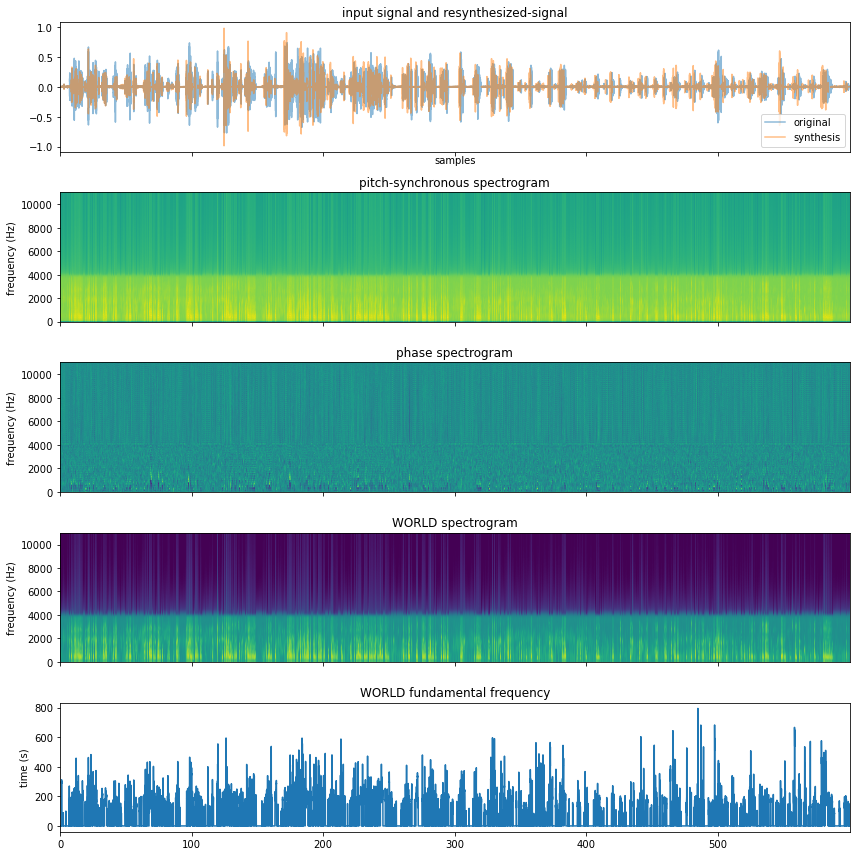

In [27]:
%matplotlib inline
import matplotlib.pylab as plt
vocoder.draw(x, dat, figure_size=(12,12))

In [30]:
wav_path[0:-4]

'/home/catskills/Desktop/openasr/Python-WORLD/test/BABEL_BP_107_11031_20120617_182613_inLine'

In [32]:
output_fn=wav_path[0:-4]+ '-resynth.wav'
wavwrite(output_fn, fs, (dat['out'] * 2 ** 15).astype(np.int16))

In [33]:
output_fn

'/home/catskills/Desktop/openasr/Python-WORLD/test/BABEL_BP_107_11031_20120617_182613_inLine-resynth.wav'

In [35]:
import IPython
IPython.display.Audio(wav_path)

In [34]:
IPython.display.Audio(output_fn)

NameError: name 'IPython' is not defined

In [52]:
from world.get_seeds_signals import get_seeds_signals

In [54]:
ss=get_seeds_signals(dat['fs'])

In [55]:
ss['pulse'].shape

(512, 3)

In [56]:
ss['noise'].shape

(8192, 3)